# Customer segmentation clustering

* ID - Уникальный идентификатор клиента
* Gender - Пол клиента
* Ever_Married - Семейное положение
* Age - Возраст клиента
* Graduated - Окончил университет или нет
* Profession - Профессия
* Work_Experience - Опыт работы в годах
* Spending_Score - Оценка расходов клиента
* Family_Size - Количество членов семьи клиента (включая клиента)
* Var_1 - Анонимизированная категория для клиента

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_dataset.csv')
df.head(7)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


In [3]:
df.shape

(8068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


<Axes: ylabel='Gender'>

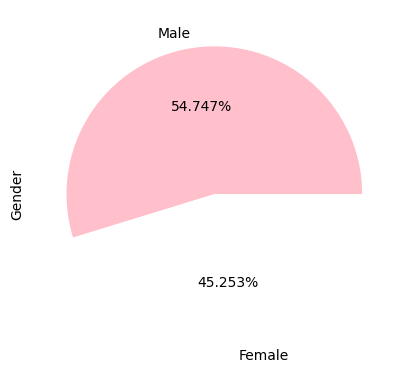

In [5]:
df['Gender'].value_counts().plot.pie(autopct='%1.3f%%', colors=['pink', 'white'])

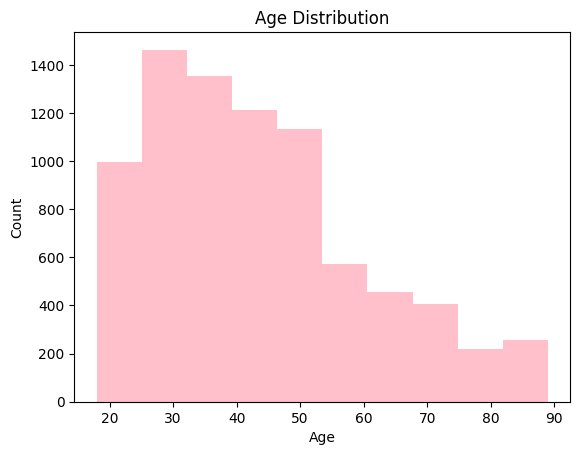

In [6]:
plt.hist(df['Age'], bins=10, color='pink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## Категориальные переменные

In [7]:
col = df.columns

print("Категориальные переменные \n")
for i in col:
    if df[i].dtype == 'O':
        print(i)

Категориальные переменные 

Gender
Ever_Married
Graduated
Profession
Spending_Score
Var_1


### Gender

In [8]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [9]:
gender = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].map(gender)
df['Gender'].value_counts()

0    4417
1    3651
Name: Gender, dtype: int64

### Ever_Married

In [10]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [11]:
dict_replace = {'Yes': 1, 'No': 0}

df['Ever_Married'] = df['Ever_Married'].map(dict_replace)

In [12]:
df['Ever_Married'].value_counts()

1.0    4643
0.0    3285
Name: Ever_Married, dtype: int64

### Graduated

In [13]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [14]:
dict_replace = {'Yes': 1, 'No': 0}
df['Graduated'] = df['Graduated'].map(dict_replace)

In [15]:
df['Graduated'].value_counts()

1.0    4968
0.0    3022
Name: Graduated, dtype: int64

### Profession

In [16]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [17]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [18]:
dict_replace = {'Healthcare': 0, 'Engineer': 1, 'Lawyer': 2, 'Entertainment': 3, 'Artist': 4,
       'Executive': 5, 'Doctor': 6, 'Homemaker': 7, 'Marketing': 8}

df['Profession'] = df['Profession'].map(dict_replace)

In [19]:
df['Profession'].value_counts()

4.0    2516
0.0    1332
3.0     949
1.0     699
6.0     688
2.0     623
5.0     599
8.0     292
7.0     246
Name: Profession, dtype: int64

### Spending_Score

In [20]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [21]:
dict_replace = {'Low': 0, 'Average': 1, 'High': 2}

df['Spending_Score'] = df['Spending_Score'].map(dict_replace)

In [22]:
df['Spending_Score'].value_counts()

0    4878
1    1974
2    1216
Name: Spending_Score, dtype: int64

### Var_1

In [23]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [24]:
df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [25]:
dict_replace = {'Cat_4': 3, 'Cat_6': 5, 'Cat_7': 6, 'Cat_3': 2, 'Cat_1': 0, 'Cat_2': 1, 'Cat_5': 4}

df['Var_1'] = df['Var_1'].map(dict_replace)

In [26]:
df['Var_1'].value_counts()

5.0    5238
3.0    1089
2.0     822
1.0     422
6.0     203
0.0     133
4.0      85
Name: Var_1, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     7928 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   float64
 5   Profession       7944 non-null   float64
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 630.4 KB


## Работа с пропусками

In [28]:
df.head(7)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,0,0.0,22,0.0,0.0,1.0,0,4.0,3.0
1,462643,1,1.0,38,1.0,1.0,NaN,1,3.0,3.0
2,466315,1,1.0,67,1.0,1.0,1.0,0,1.0,5.0
3,461735,0,1.0,67,1.0,2.0,0.0,2,2.0,5.0
4,462669,1,1.0,40,1.0,3.0,NaN,2,6.0,5.0
5,461319,0,1.0,56,0.0,4.0,0.0,1,2.0,5.0
6,460156,0,0.0,32,1.0,0.0,1.0,0,3.0,5.0


In [29]:
df.columns[df.isna().any()].to_list()

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1']

In [30]:
col = ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']

for i in col:
    print(i, df[i].isna().sum())

Ever_Married 140
Graduated 78
Profession 124
Work_Experience 829
Family_Size 335
Var_1 76


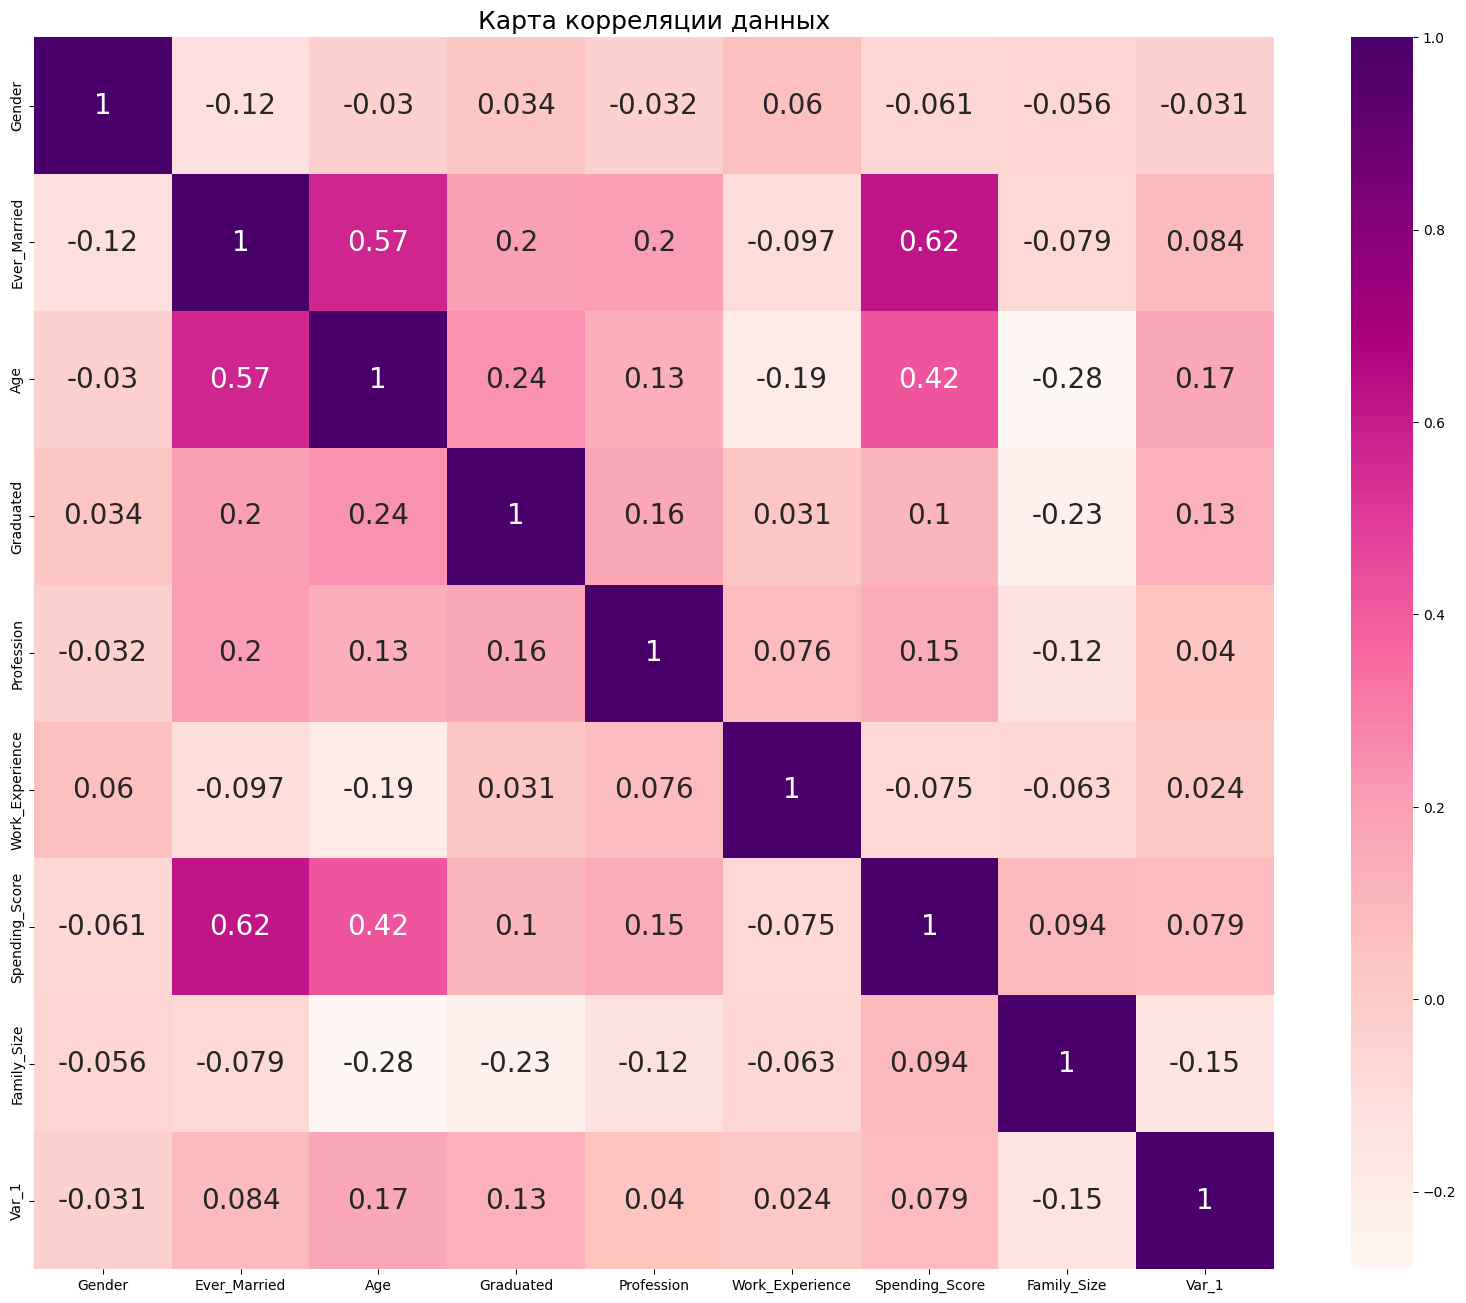

In [31]:
plt.figure(figsize=(20, 16))

temp_df = df.drop(['ID'], axis=1)
dataplot = sns.heatmap(temp_df.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 20})

plt.title("Карта корреляции данных", fontsize=18)
plt.show()

### Graduated 

In [32]:
df.groupby('Graduated')['Age'].mean()

Graduated
0.0    38.376241
1.0    46.542271
Name: Age, dtype: float64

In [33]:
def get_mode(x):
    return x.mode().iloc[0]

df.groupby('Graduated')['Age'].agg(get_mode)

Graduated
0.0    22
1.0    35
Name: Age, dtype: int64

In [34]:
df.groupby('Graduated')['Family_Size'].mean()

Graduated
0.0    3.304878
1.0    2.574588
Name: Family_Size, dtype: float64

In [35]:
df.groupby('Graduated')['Family_Size'].agg(get_mode)

Graduated
0.0    4.0
1.0    2.0
Name: Family_Size, dtype: float64

### Гипотеза такая, что если Family_size <= 3 и Age >= 35 то образовние имеется 

In [36]:
temp_df = df[['Graduated', 'Family_Size', 'Age']]
temp_df[temp_df['Graduated']  == 1].shape

(4968, 3)

Всего 4968 человек с высшем образованием

In [37]:
temp_df[(temp_df['Graduated'] == 1) & (temp_df['Family_Size'] <= 3) & (temp_df['Age'] >= 35)]

,Graduated,Family_Size,Age
1,1.0,3.0,38
2,1.0,1.0,67
3,1.0,2.0,67
8,1.0,3.0,61
19,1.0,1.0,79
...,...,...,...
8052,1.0,2.0,37
8054,1.0,3.0,49
8056,1.0,3.0,63
8059,1.0,2.0,39


In [38]:
temp_df[(temp_df['Graduated'] == 1) & (temp_df['Age'] >= 29)].shape

(4513, 3)

In [39]:
temp_df[(temp_df['Graduated'] == 0) & (temp_df['Age'] >= 29)].shape

(1851, 3)

In [40]:
df['Graduated'].value_counts()

1.0    4968
0.0    3022
Name: Graduated, dtype: int64

In [41]:
def fill_Graduated(row):
    Age = row['Age']
    Graduated = row['Graduated']
    if(pd.isnull(Graduated)): 
        if(Age >= 29):
            return 1
        else:
            return 0
    else:
        return Graduated

In [42]:
df['Graduated'] = df.apply(fill_Graduated, axis=1)

In [43]:
df['Graduated'].value_counts()

1.0    5025
0.0    3043
Name: Graduated, dtype: int64

### Ever_Married

In [44]:
df['Ever_Married'].value_counts()

1.0    4643
0.0    3285
Name: Ever_Married, dtype: int64

In [45]:
df.groupby(['Gender', 'Ever_Married']).size()

Gender  Ever_Married
0       0.0             1578
        1.0             2775
1       0.0             1707
        1.0             1868
dtype: int64

In [46]:
df.groupby('Ever_Married')['Age'].mean()

Ever_Married
0.0    32.237747
1.0    51.477278
Name: Age, dtype: float64

In [47]:
df.groupby('Ever_Married')['Age'].agg(get_mode)

Ever_Married
0.0    33
1.0    35
Name: Age, dtype: int64

In [48]:
df[(df['Age'] <= 33) & (df['Ever_Married'] == 0)].shape

(2165, 10)

In [49]:
df[(df['Age'] >= 33) & (df['Ever_Married'] == 1)].shape

(4222, 10)

In [50]:
df.groupby('Ever_Married')['Spending_Score'].mean()

Ever_Married
0.0    0.000000
1.0    0.923756
Name: Spending_Score, dtype: float64

In [51]:
df.groupby('Ever_Married')['Spending_Score'].agg(get_mode)

Ever_Married
0.0    0
1.0    1
Name: Spending_Score, dtype: int64

In [52]:
df[(df['Ever_Married'] == 1) & (df['Spending_Score'] >= 1)].shape

(3113, 10)

In [53]:
df[(df['Ever_Married'] == 0) & (df['Spending_Score'] < 1)].shape

(3285, 10)

In [54]:
temp_df = df[['Ever_Married', 'Spending_Score', 'Age', 'Gender']]
temp_df

,Ever_Married,Spending_Score,Age,Gender
0,0.0,0,22,0
1,1.0,1,38,1
2,1.0,0,67,1
3,1.0,2,67,0
4,1.0,2,40,1
...,...,...,...,...
8063,0.0,0,22,0
8064,0.0,0,35,0
8065,0.0,0,33,1
8066,0.0,0,27,1


In [55]:
Data_for_predict = temp_df[temp_df['Ever_Married'].isna()]
Data_for_predict

,Ever_Married,Spending_Score,Age,Gender
24,NaN,1,58,1
108,NaN,0,19,1
201,NaN,0,19,0
213,NaN,2,85,1
272,NaN,2,19,0
...,...,...,...,...
7756,NaN,0,20,0
7775,NaN,0,32,0
8011,NaN,0,49,1
8030,NaN,0,45,0


In [56]:
Data_Train = temp_df[temp_df['Ever_Married'].isna() == False]
Data_Train

,Ever_Married,Spending_Score,Age,Gender
0,0.0,0,22,0
1,1.0,1,38,1
2,1.0,0,67,1
3,1.0,2,67,0
4,1.0,2,40,1
...,...,...,...,...
8063,0.0,0,22,0
8064,0.0,0,35,0
8065,0.0,0,33,1
8066,0.0,0,27,1


In [57]:
Data_Test = temp_df[temp_df['Ever_Married'].isna()]
Data_Test

,Ever_Married,Spending_Score,Age,Gender
24,NaN,1,58,1
108,NaN,0,19,1
201,NaN,0,19,0
213,NaN,2,85,1
272,NaN,2,19,0
...,...,...,...,...
7756,NaN,0,20,0
7775,NaN,0,32,0
8011,NaN,0,49,1
8030,NaN,0,45,0


### Logistic Regression for Ever_Married

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [59]:
X_train = Data_Train.drop('Ever_Married', axis=1)
Y_train = Data_Train['Ever_Married']

scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [60]:
logreg = LogisticRegression()
logreg.fit(X_scaled, Y_train)

LogisticRegression()

In [61]:
X_test = Data_Test.drop('Ever_Married', axis=1)

In [62]:
X_test_scaled = scaler.transform(X_test)

In [63]:
y_pred = logreg.predict(X_test_scaled)

In [64]:
y_pred

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0.])

In [65]:
df.loc[df['Ever_Married'].isna(), 'Ever_Married'] = [i for i in y_pred]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       7944 non-null   float64
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 630.4 KB


### Profession

dict_replace = {'Healthcare': 0, 'Engineer': 1, 'Lawyer': 2, 'Entertainment': 3, 'Artist': 4,
       'Executive': 5, 'Doctor': 6, 'Homemaker': 7, 'Marketing': 8}

In [67]:
df.groupby(['Profession', 'Gender']).size()

Profession  Gender
0.0         0          775
            1          557
1.0         0          140
            1          559
2.0         0          316
            1          307
3.0         0          696
            1          253
4.0         0         1303
            1         1213
5.0         0          567
            1           32
6.0         0          384
            1          304
7.0         0           43
            1          203
8.0         0          128
            1          164
dtype: int64

In [68]:
df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   float64
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 630.4 KB


### Var_1

In [70]:
df['Var_1'].value_counts()

5.0    5238
3.0    1089
2.0     822
1.0     422
6.0     203
0.0     133
4.0      85
Name: Var_1, dtype: int64

In [71]:
df['Var_1'].fillna(df['Var_1'].mode()[0], inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   float64
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      7733 non-null   float64
 9   Var_1            8068 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 630.4 KB


### Family_Size

In [73]:
df.groupby('Family_Size')['Age'].agg(get_mode)

Family_Size
1.0    40
2.0    37
3.0    32
4.0    31
5.0    33
6.0    26
7.0    26
8.0    27
9.0    22
Name: Age, dtype: int64

In [74]:
df.groupby('Family_Size').size()

Family_Size
1.0    1453
2.0    2390
3.0    1497
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
dtype: int64

In [75]:
df.loc[df['Family_Size'].isna(), 'Family_Size'] = df.loc[df['Family_Size'].isna(), 'Age'].apply(lambda x: 2 if x > 30 else 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   int64  
 2   Ever_Married     8068 non-null   float64
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   float64
 5   Profession       8068 non-null   float64
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   int64  
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 630.4 KB


### Work_Experience

In [77]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,0,0.0,22,0.0,0.0,1.0,0,4.0,3.0
1,462643,1,1.0,38,1.0,1.0,NaN,1,3.0,3.0
2,466315,1,1.0,67,1.0,1.0,1.0,0,1.0,5.0
3,461735,0,1.0,67,1.0,2.0,0.0,2,2.0,5.0
4,462669,1,1.0,40,1.0,3.0,NaN,2,6.0,5.0


### XGBoost for predict Work_Experience

In [78]:
X_train = df[df['Work_Experience'].notnull()].drop('Work_Experience', axis=1)
Y_train = df[df['Work_Experience'].notnull()]['Work_Experience']

In [79]:
X_test = df[df['Work_Experience'].isna()].drop('Work_Experience', axis=1)
X_test.shape

(829, 9)

In [80]:
X_train.drop('ID', axis=1, inplace=True)
X_test.drop('ID', axis=1, inplace=True)

In [81]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
xgb_clf = XGBClassifier()

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0],
              'gamma': [0, 0.1, 0.5, 1]}


In [84]:
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [85]:
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [86]:
predictions = best_model.predict(X_test)

In [88]:
df.loc[df['Work_Experience'].isna(), 'Work_Experience'] = [i for i in predictions]

## Hierarchical clustering

In [172]:
from sklearn.cluster import AgglomerativeClustering
X = df.drop('ID', axis=1)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)

In [174]:
agg = AgglomerativeClustering(n_clusters=5)

agg.fit(scaled_data)

labels = agg.labels_

In [175]:
df['Segmentation'] = labels + 1
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,lables,Segmentation
0,462809,0,0.0,22,0.0,0.0,1.0,0,4.0,3.0,1,2
1,462643,1,1.0,38,1.0,1.0,1.0,1,3.0,3.0,2,3
2,466315,1,1.0,67,1.0,1.0,1.0,0,1.0,5.0,3,5
3,461735,0,1.0,67,1.0,2.0,0.0,2,2.0,5.0,3,5
4,462669,1,1.0,40,1.0,3.0,1.0,2,6.0,5.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0,0.0,22,0.0,4.0,0.0,0,7.0,0.0,1,2
8064,464685,0,0.0,35,0.0,5.0,3.0,0,4.0,3.0,2,2
8065,465406,1,0.0,33,1.0,0.0,1.0,0,1.0,5.0,1,2
8066,467299,1,0.0,27,1.0,0.0,1.0,0,4.0,5.0,1,2


In [176]:
answer = df[['ID', 'Segmentation']]
answer.head(20)

,ID,Segmentation
0,462809,2
1,462643,3
2,466315,5
3,461735,5
4,462669,3
5,461319,1
6,460156,2
7,464347,2
8,465015,5
9,465176,1


In [177]:
unique_labels =  answer['Segmentation'].unique()
label_map = dict(zip(unique_labels, range(1, len(unique_labels)+1)))
label_map

{2: 1, 3: 2, 5: 3, 1: 4, 4: 5}

In [178]:
answer['Segmentation'] = answer['Segmentation'].map(label_map)
answer

<ipython-input-178-3542ec10ae17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['Segmentation'] = answer['Segmentation'].map(label_map)


,ID,Segmentation
0,462809,1
1,462643,2
2,466315,3
3,461735,3
4,462669,2
...,...,...
8063,464018,1
8064,464685,1
8065,465406,1
8066,467299,1


In [179]:
answer.to_csv('result8.csv', index=False)

## DBSCAN

In [167]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=5).fit(scaled_data)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

n_clusters_, n_noise_

(118, 1535)

In [168]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8068.0,-8.102371e-17,1.712932,-3.702258,-1.435331,-0.170968,1.400902,3.857076
col2,8068.0,7.045540e-17,1.190898,-3.725638,-0.827211,0.002681,0.831052,4.512987
col3,8068.0,4.403463e-17,1.039595,-2.863184,-0.758307,-0.046161,0.677355,4.620000


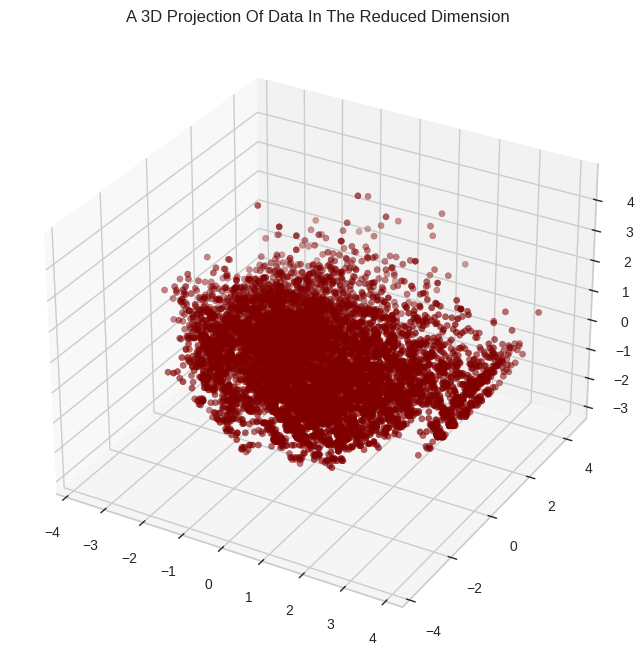

In [169]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

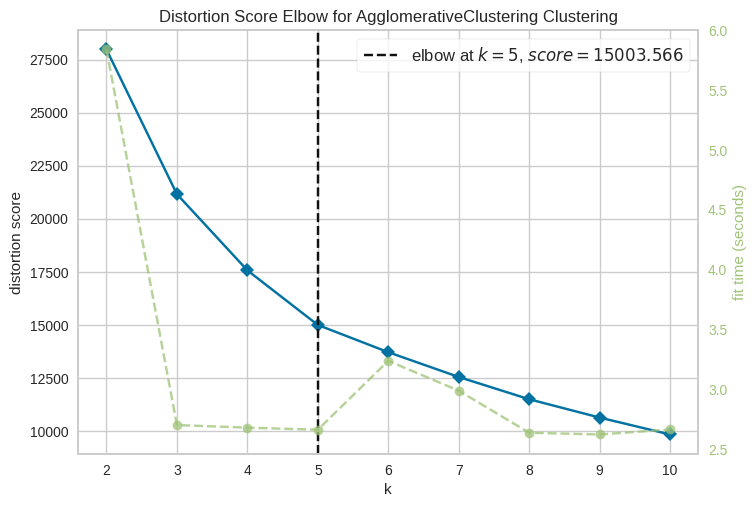

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [171]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()